In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [283]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/HEROMOTOCO.csv")

In [284]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HEROHONDA,EQ,1145.20,1200.0,1236.80,1171.00,1209.95,1207.60,1209.11,10631,1.285401e+12,NaN,NaN,NaN
1,2000-01-04,HEROHONDA,EQ,1207.60,1200.0,1220.00,1176.00,1200.00,1199.85,1200.93,19849,2.383719e+12,NaN,NaN,NaN
2,2000-01-05,HEROHONDA,EQ,1199.85,1155.0,1178.00,1140.00,1140.00,1143.80,1159.74,2525,2.928355e+11,NaN,NaN,NaN
3,2000-01-06,HEROHONDA,EQ,1143.80,1183.0,1189.95,1150.25,1165.00,1161.40,1167.29,4375,5.106887e+11,NaN,NaN,NaN
4,2000-01-07,HEROHONDA,EQ,1161.40,1140.0,1140.00,1069.00,1105.00,1106.55,1103.52,9093,1.003429e+12,NaN,NaN,NaN


In [285]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [286]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.797000e+03,4797.000000
mean,1651.346862,1653.169544,1675.767273,1628.693781,1651.483047,1651.662345,1652.497631,4.871809e+05,9.100201e+13,37295.248779,2.599261e+05,0.519843
std,1083.346794,1085.385796,1095.027199,1073.447115,1083.179725,1083.443103,1084.177213,5.300477e+05,1.396886e+14,26960.953831,2.785190e+05,0.155270
min,116.650000,117.000000,123.700000,115.050000,117.000000,116.650000,118.880000,5.960000e+02,2.765216e+10,646.000000,1.642000e+03,0.083700
25%,697.287500,697.325000,709.900000,682.000000,697.000000,697.287500,696.077500,2.078688e+05,1.588965e+13,20107.500000,1.227350e+05,0.413600
50%,1689.425000,1690.000000,1713.500000,1660.750000,1689.550000,1689.925000,1686.615000,3.546025e+05,5.149785e+13,29540.000000,2.018250e+05,0.526400
75%,2584.487500,2590.000000,2617.775000,2555.750000,2585.000000,2584.725000,2588.282500,5.967798e+05,1.114694e+14,45236.500000,3.266780e+05,0.632700
max,4048.950000,4084.000000,4091.950000,3995.000000,4036.050000,4048.950000,4046.970000,1.166595e+07,3.359303e+15,243105.000000,8.862088e+06,1.000000


In [287]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [288]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [289]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [290]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [291]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [292]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [293]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5301,1.710247,0.157340,2864.55,831133,NaN
5302,2.395262,1.060870,2905.50,811184,NaN
5303,3.222929,-0.059768,2926.25,1389833,NaN
5304,3.991158,-3.498887,2860.10,1009327,NaN
5305,1.960784,-0.552067,2819.15,670258,NaN


In [294]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [295]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [296]:
#Define the prediction model
model = RandomForestRegressor()

In [297]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [298]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9753079252061572


In [299]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [300]:
predictions = model.predict(X_Check)

In [301]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

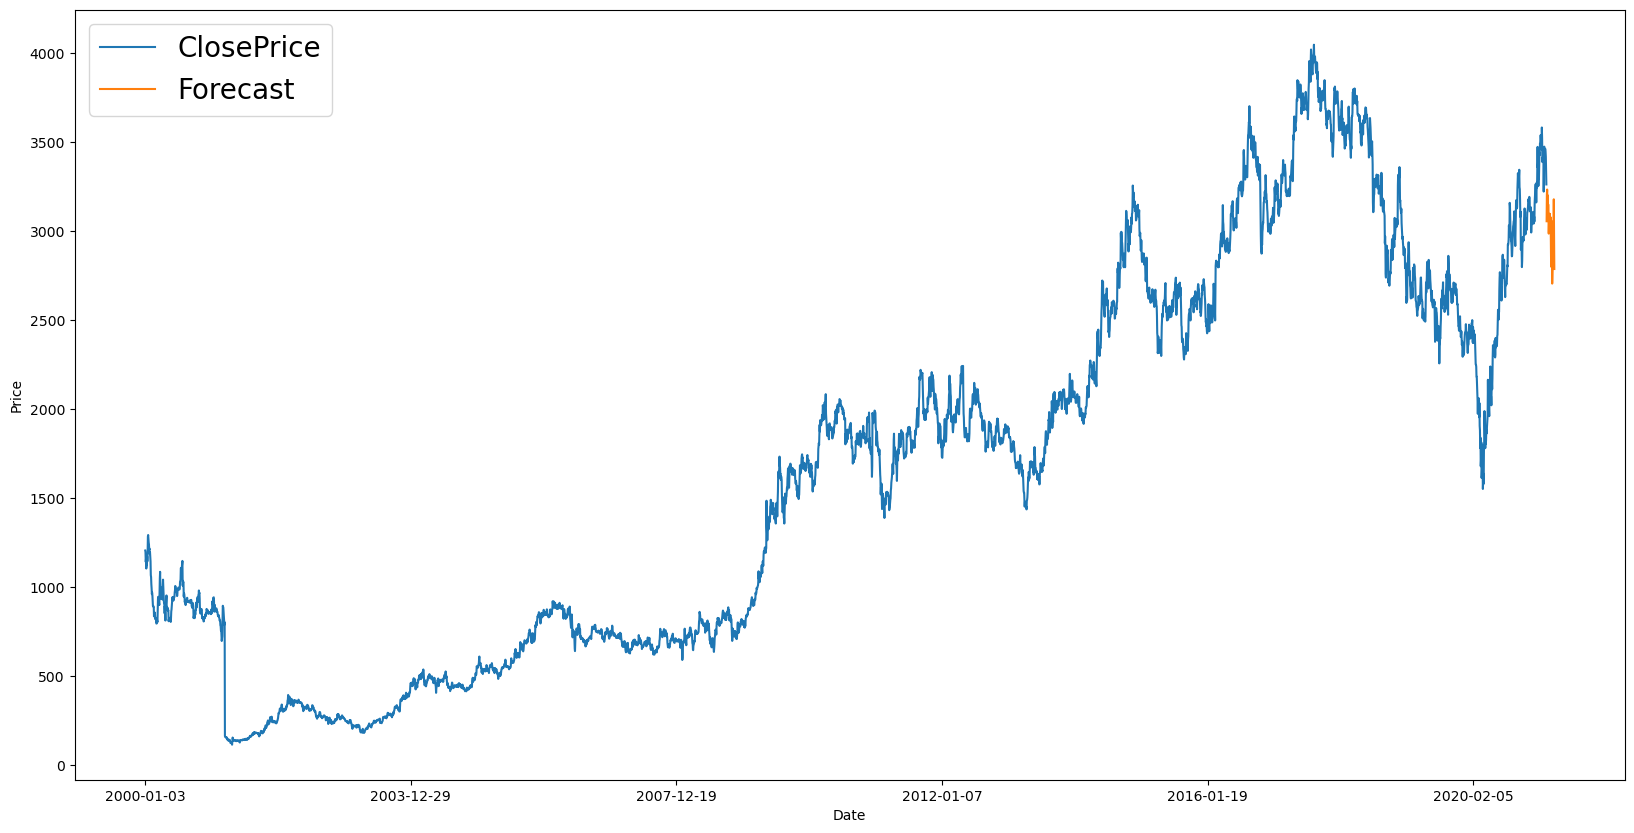

In [302]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')